In [1]:
from eunjeon import Mecab
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

상폐기업뉴스 = pd.read_csv('../../Step3_뉴스전처리/전처리후/상폐기업뉴스전처리.csv')
상폐기업뉴스추가 = pd.read_csv('../../Step3_뉴스전처리/전처리후/상폐기업뉴스전처리추가.csv')
상폐기업뉴스 = pd.concat([상폐기업뉴스, 상폐기업뉴스추가])
상폐기업뉴스.reset_index(inplace=True, drop=True)

정상기업뉴스 = pd.read_csv('../../Step3_뉴스전처리/전처리후/정상기업뉴스전처리.csv', encoding='cp949')
정상기업뉴스추가 = pd.read_csv('../../Step3_뉴스전처리/전처리후/정상기업뉴스전처리추가.csv')
정상기업뉴스 = pd.concat([정상기업뉴스, 정상기업뉴스추가])
정상기업뉴스.reset_index(inplace=True, drop=True)

뉴스 = pd.concat([정상기업뉴스, 상폐기업뉴스])
뉴스.reset_index(drop=True, inplace=True)
뉴스

In [4]:
mecab = Mecab()
# Mecab으로 토큰화
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.morphs(x))
# 한 글자 단어 제거
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])
# stopwords에 있는 불용어 제거
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word not in stopwords])
뉴스

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.08.16. 오후 5:21,"네이쳐글로벌, 반기검토의견 ""의견거절'…거래정지","[글로벌, 반기, 검토, 의견, 의견, 거절, 관리, 종목, 지정, 사유, 발생, ..."
1,네이쳐글로벌,2010.07.15. 오후 6:46,네이쳐글로벌 신용등급 `CC`로 두단계 하향,"[글로벌, 신용, 등급, 기존, 에서, 하향, 조정, 한다고, 신정, 평가, 밝혔,..."
2,네이쳐글로벌,2010.06.03. 오후 5:06,"네이쳐글로벌, 20대 1 감자 실시","[글로벌, 감자, 결의, 다고, 공시, 감자, 주주, 총회, 다음, 감자, 기준일,..."
3,네이쳐글로벌,2010.05.24. 오전 10:41,<생생코스닥> 네이쳐글로벌 3거래일 연속 하한가,"[글로벌, 거래일, 연속, 하한가, 기록, 주가, 마저, 위협, 글로벌, 오전, 시..."
4,네이쳐글로벌,2010.05.18. 오후 1:23,"네이쳐글로벌 ""생수시장 진출 하반기 150억 계획""","[글로벌, 규모, 생수, 회사, 자산, 양수, 방식, 인수, 추진, 라고, 밝혔, ..."
...,...,...,...,...
5787,코썬바이오,2020.01.10. 오후 7:40,"코썬바이오, 불성실공시법인 지정","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 지난해, 최대, 주주, 변경, 수..."
5788,코썬바이오,2019.12.20. 오후 6:53,"거래소, 코썬바이오 불성실 공시법인 지정…23일 주식거래 정지","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 성실, 공시, 법인, 지정, 한다..."
5789,코썬바이오,2019.12.23. 오후 5:17,코썬바이오 불성실 공시법인 지정예고,"[공시, 불이행, 성실, 공시, 법인, 지정, 예고, 다고, 공시, 사유, 최대, ..."
5790,코썬바이오,2019.12.23. 오후 5:23,"거래소, 코썬바이오 불성실 공시법인 지정예고","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 공시, 불이행, 따라, 성실, 공..."


리뷰의 최대 길이 : 2792
리뷰의 평균 길이 : 179.07004944666824


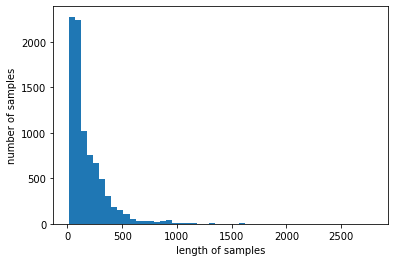

In [5]:
print('리뷰의 최대 길이 :',max(len(review) for review in 뉴스['뉴스기사본문전처리']))
print('리뷰의 평균 길이 :',sum(map(len, 뉴스['뉴스기사본문전처리']))/len(뉴스['뉴스기사본문전처리']))
plt.hist([len(review) for review in 뉴스['뉴스기사본문전처리']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [6]:
# size = 만들어질 워드 벡터의 차원
# window = 단어 앞과 뒤에서 몇개를 볼것인지 정하는 킉
# min_count = 단어 최소 빈도수의 임계치(이 임계치보다 적은 단어는 훈련시키지 않음)
# workers = 학습에 이용하는 프로세스의 갯수
# sg = 0 일 경우 CBOW, 1 일 경우 Skip-gram
model = Word2Vec(sentences=뉴스['뉴스기사본문전처리'], window = 5, min_count = 5, workers = 4, sg = 1)
model.wv.vectors.shape

(13190, 100)

In [7]:
# 폐지 유사단어 추출
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,상장,0.799999
1,퇴출,0.777704
2,격성,0.759899
3,심사,0.731102
4,라컴,0.715698
5,일내,0.704724
6,판가름,0.703319
7,들어간다,0.700381
8,양오,0.694572
9,이의,0.689898


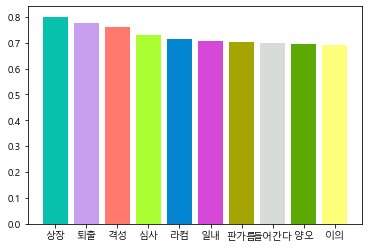

In [9]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

def showGraph(bargraph):
     xtick = [item[0] for item in bargraph] # 단어
     ytick = [item[1] for item in bargraph] # 유사도
     plt.figure()
     mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a' ]
     plt.bar(xtick, ytick, color=mycolors)

bargraph = model.wv.most_similar(positive=['폐지'],topn=10)

showGraph(bargraph)

## 출처 : https://m.blog.naver.com/skfnsid123/221922849459

In [113]:
## Embedding Projector 사용 위한 tsv파일 저장

df = pd.DataFrame(model.wv.vectors)
df.to_csv('./wv_model_tsv_mecab.tsv', sep='\t', index=False)
word_df = pd.DataFrame(model.wv.index_to_key)
word_df.to_csv('./wv_word_tsv_mecab.tsv', sep = '\t', index = False)

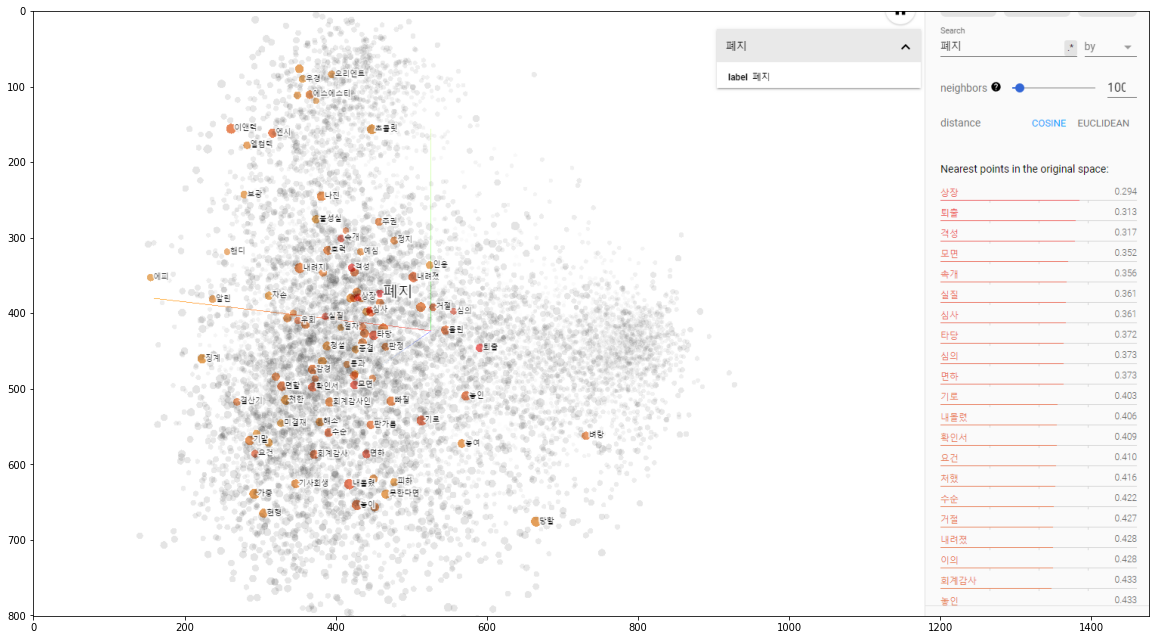

In [5]:
path = './Embedding_Project_mecab.png'
image_pil = Image.open(path)
image_bw = np.array(image_pil)

plt.figure(figsize=(20,30))
plt.imshow(image_bw)
plt.show()

## 출처 https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=222099536934

#### 기사수비교

In [10]:
분류단어 = ['퇴출', '격성', '요주', '폐지']	
분류단어 = '|'.join(분류단어)
분류단어

'퇴출|격성|요주|폐지'

In [34]:
# 정상기업에서 부도기사 수
mecab = Mecab()
# Mecab으로 토큰화
정상기업뉴스['뉴스기사본문전처리'] = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.morphs(x))
# 한 글자 단어 제거
정상기업뉴스['뉴스기사본문전처리'] = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])
# stopwords에 있는 불용어 제거
정상기업뉴스['뉴스기사본문전처리'] = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word not in stopwords])

라벨 = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word in 분류단어])
라벨 = 라벨.apply(lambda x: 1 if (len(x)>=1) else 0)
정상기업뉴스['긍정부정기사분류'] = 라벨
정상기업부도기사수 = len(정상기업뉴스[정상기업뉴스['긍정부정기사분류']==1])

In [39]:
# 부도기업에서 부도기사 수
mecab = Mecab()
# Mecab으로 토큰화
상폐기업뉴스['뉴스기사본문전처리'] = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.morphs(x))
# 한 글자 단어 제거
상폐기업뉴스['뉴스기사본문전처리'] = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])
# stopwords에 있는 불용어 제거
상폐기업뉴스['뉴스기사본문전처리'] = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word not in stopwords])

라벨 = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word in 분류단어])
라벨 = 라벨.apply(lambda x: 1 if (len(x)>=1) else 0)
상폐기업뉴스['긍정부정기사분류'] = 라벨
상폐기업부도기사수 = len(상폐기업뉴스[상폐기업뉴스['긍정부정기사분류']==1])

In [38]:
상폐기업부도기사수 - 정상기업부도기사수

1258